In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
color_map = ['tab:green', 'tab:orange', 'tab:blue']
# color_map
fill_map = ['lightgreen', 'bisque', 'lightblue']

In [4]:
def get_reward_arr(exp_name, n_seed):

    summary_f = open("result_new/summary_{}.log".format(exp_name), 'w')

    with open("exp_logs_new/{}.log".format(exp_name), "r") as f:
        Stage = 0
        Seed = 0
        rewards_all = []
        rewards_pkl = []
        
        text_all = f.readlines()
        for i, text in enumerate(text_all):
            if text[:16] == "Training stage-{}".format(Stage):
                if len(rewards_all) > 0:
                    summary_f.write(str(rewards_all))
                    summary_f.write('\n')
                    summary_f.write(str(rewards_all[-1]) + '\n')
                    rewards_pkl.append(np.array(rewards_all))
                    rewards_all = []
                summary_f.write("# Stage {} \n".format(Stage))
                Stage += 1
                Seed = 0
            if text[:15] == "Training seed-{}".format(Seed):
                if len(rewards_all) > 0:
                    summary_f.write(str(rewards_all))
                    summary_f.write('\n')
                    summary_f.write(str(rewards_all[-1]) + '\n')
                    rewards_pkl.append(np.array(rewards_all))
                    rewards_all = []
                summary_f.write("# seed {} \n".format(Seed))
                Seed += 1
            if text[:7] == 'reward:':
                # print(text)
                reward = text[9:-2].split(', ')
                rewards_all.append(np.mean([float(r) for r in reward]))
                
        if len(rewards_all) % 50 == 0:
            summary_f.write(str(rewards_all))
            summary_f.write('\n')
            summary_f.write(str(rewards_all[-1]) + '\n')
            rewards_pkl.append(np.array(rewards_all))
            rewards_all = []


    return rewards_pkl

In [37]:
def plot_rewards(noise=0, plot_save=False):
    # RA-MADDPG
    rewards_ra_maddpg = get_reward_arr(exp_name = f"ramaddpg_noise{noise}", n_seed = 3)
    # EPC 
    rewards_epc = get_reward_arr(exp_name = f"epc_noise{noise}", n_seed = 3)
    # R-MADDPG
    rewards_rmaddpg = []
    j = 0
    for i in range(3):
        tmp = get_reward_arr(exp_name = f"rmaddpg_noise{noise}_agent3", n_seed = 1)
        rewards_rmaddpg.extend(tmp)
    for i in range(3):
        tmp = get_reward_arr(exp_name = f"rmaddpg_noise{noise}_agent6", n_seed = 1)
        rewards_rmaddpg.extend(tmp)
    for i in range(3):
        tmp = get_reward_arr(exp_name = f"rmaddpg_noise{noise}_agent12", n_seed = 1)
        rewards_rmaddpg.extend(tmp)


    exp_names = ['R-MADDPG', 'EPC', 'RA-MADDPG'] 
    reward_names = [rewards_rmaddpg, rewards_epc, rewards_ra_maddpg]
    n_seed_dict = {'R-MADDPG':3, 'EPC':3, 'RA-MADDPG':3}

    n_agents = [3, 6, 12]
    Stage = 3
    for s in range(Stage):
        n_agent = n_agents[s]
        for i, (exp, reward) in enumerate(zip(exp_names, reward_names)):
            n_seed = n_seed_dict[exp]
            x_axis = np.arange(len(reward[s*n_seed])) * 1000
            mean = np.mean(reward[s*n_seed : (s+1)*n_seed], axis=0)
            std = np.std(reward[s*n_seed : (s+1)*n_seed], axis=0)
            plt.plot(x_axis, mean, label=exp, color=color_map[i])
            plt.fill_between(x_axis, mean-std, mean+std, facecolor=fill_map[i])
        plt.ylim(-30, 30)
        plt.legend()
        plt.xlabel('Episodes')
        plt.ylabel('Average Rewards')
        plt.title(f'Food Collection with {n_agent} Agents and Reward Noise {noise:.1f}')
        if plot_save:
            plt.savefig(f'./imgs_new/Noise{noise}_Agent{n_agent}_total.png')
        plt.show()
        

### Change NOISE Values

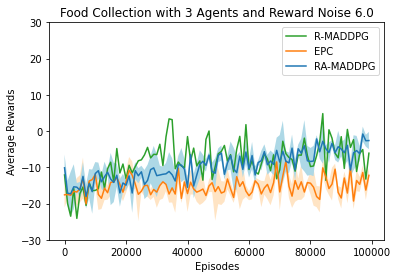

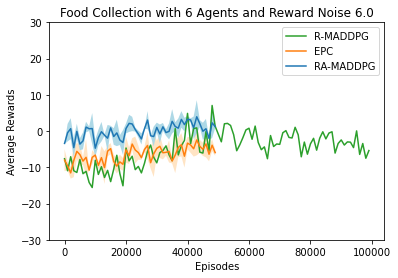

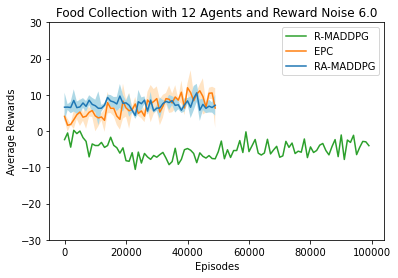

In [39]:
plot_rewards(noise=6, plot_save=True)